In [220]:
import pandas as pd
df = pd.read_csv('./dataset.csv')
print(df.to_string())

      Loan_ID  Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
0    LP001002    Male      No          0      Graduate            No             5849           0.000000         NaN             360.0             1.0         Urban           Y
1    LP001003    Male     Yes          1      Graduate            No             4583        1508.000000       128.0             360.0             1.0         Rural           N
2    LP001005    Male     Yes          0      Graduate           Yes             3000           0.000000        66.0             360.0             1.0         Urban           Y
3    LP001006    Male     Yes          0  Not Graduate            No             2583        2358.000000       120.0             360.0             1.0         Urban           Y
4    LP001008    Male      No          0      Graduate            No             6000           0.000000       141.

Remove all NaN value

In [221]:
df2=df.dropna(axis=0)
print(df2.to_string())

      Loan_ID  Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
1    LP001003    Male     Yes          1      Graduate            No             4583        1508.000000       128.0             360.0             1.0         Rural           N
2    LP001005    Male     Yes          0      Graduate           Yes             3000           0.000000        66.0             360.0             1.0         Urban           Y
3    LP001006    Male     Yes          0  Not Graduate            No             2583        2358.000000       120.0             360.0             1.0         Urban           Y
4    LP001008    Male      No          0      Graduate            No             6000           0.000000       141.0             360.0             1.0         Urban           Y
5    LP001011    Male     Yes          2      Graduate           Yes             5417        4196.000000       267.

#Adjust string value 

In [222]:
df2['Self_Employed']=df2.Self_Employed.eq('Yes').mul(1)
df2['Education']=df2.Education.eq('Graduate').mul(1)
df2['Married']=df2.Married.eq('Yes').mul(1)
df2.replace({'Loan_Status':{"Y":1,"N":-1}},inplace=True)
df2['Gender']=df2.Gender.eq('Female').mul(1)
df2.replace({'Property_Area':{"Rural":0,"Semiurban":0.5,"Urban":1}},inplace=True)
df2.replace({'Dependents':{"3+":3}},inplace=True)

print(df2.to_string())

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
1    LP001003       0        1          1          1              0             4583        1508.000000       128.0             360.0             1.0            0.0           -1
2    LP001005       0        1          0          1              1             3000           0.000000        66.0             360.0             1.0            1.0            1
3    LP001006       0        1          0          0              0             2583        2358.000000       120.0             360.0             1.0            1.0            1
4    LP001008       0        0          0          1              0             6000           0.000000       141.0             360.0             1.0            1.0            1
5    LP001011       0        1          2          1              1             5417        4196.000000       

C:\Users\USER\AppData\Local\Temp\ipykernel_17200\174072011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Self_Employed']=df2.Self_Employed.eq('Yes').mul(1)
C:\Users\USER\AppData\Local\Temp\ipykernel_17200\174072011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Education']=df2.Education.eq('Graduate').mul(1)
C:\Users\USER\AppData\Local\Temp\ipykernel_17200\174072011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

#Separating labels and datas

In [223]:
X=df2.drop(columns={'Loan_Status','Loan_ID'}, axis=1)
Y=df2['Loan_Status']
X,Y

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 1         0        1          1          1              0             4583   
 2         0        1          0          1              1             3000   
 3         0        1          0          0              0             2583   
 4         0        0          0          1              0             6000   
 5         0        1          2          1              1             5417   
 ..      ...      ...        ...        ...            ...              ...   
 609       1        0          0          1              0             2900   
 610       0        1          3          1              0             4106   
 611       0        1          1          1              0             8072   
 612       0        1          2          1              0             7583   
 613       1        0          0          1              1             4583   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [224]:
X = X.astype(float)  
print(X.dtypes)

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object


In [225]:
import numpy as np
X = np.array(X)
Y = np.array(Y)
print(X.shape,Y.shape)

(480, 11) (480,)


#Training data

In [226]:
def train_perceptron(X, y, learning_rate=0.1, max_epochs=1000):

    
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    
    # Train the dtaa
    for epoch in range(max_epochs):
        for i in range(n_samples):
            activation = np.dot(X[i], w) + b
            
            # Update the weights and bias 
            if y[i]*activation <= 0:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                
    return w, b


In [227]:


#process training
w, b = train_perceptron(X, Y)

print("Learned weights:", w)
print("Learned bias:", b)


Learned weights: [ -318.          1399.9         1176.2         1052.2
  -207.8          111.           463.24400655 -6369.2
  1458.          4126.7           73.4       ]
Learned bias: 121.49999999999737


#Testing the program

In [228]:
#declare the prediction function
def predict_perceptron(X, w, b):
    
    activations = np.dot(X, w) + b
    
    y_pred = np.sign(activations)
    
    return y_pred


In [229]:

y_pred = predict_perceptron(X, w, b)

print("Predicted class labels:", y_pred)


Predicted class labels: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1

In [230]:
from sklearn.metrics import accuracy_score
training_data_accuracy=accuracy_score(y_pred,Y)
print(training_data_accuracy)


0.6833333333333333


<AxesSubplot:>

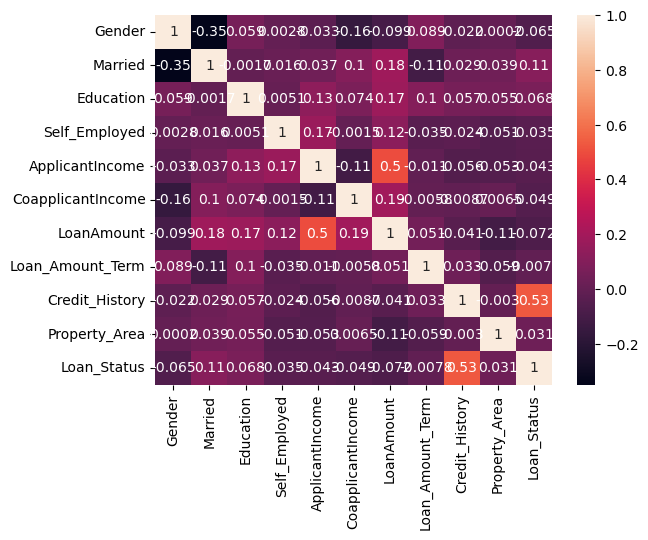

In [231]:
import seaborn as sns
heatmap=df2.drop(columns={'Loan_ID'}, axis=1).corr()
heatmap = heatmap.astype(float)  
sns.heatmap(heatmap, annot=True)